In [1]:
from matplotlib.lines import Line2D
import pandas as pd 
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import os 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Training on 56points with PH values 

## split data 811 ratio

In [2]:
# data_dir='/pscratch/sd/c/chunhui/SCM/56points/'
data_dir='datasets/'

train_csv_file = os.path.join(data_dir, 'train.pkl')
val_csv_file = os.path.join(data_dir, 'val.pkl')
test_csv_file = os.path.join(data_dir, 'test.pkl')

df_train = pd.read_pickle(train_csv_file)
df_val = pd.read_pickle(val_csv_file)
df_test = pd.read_pickle(test_csv_file)

In [3]:
df_train.shape, df_val.shape, df_test.shape

((90481, 12), (11309, 12), (11314, 12))

In [5]:
# df_test

In [6]:
df_train_wVal = pd.concat([df_train, df_val])

In [7]:
test_csv_file

'/pscratch/sd/c/chunhui/SCM/DNN/split_by_modelParams/test.pkl'

# Extract 56*3 + 3 features as input

In [8]:
x_train = df_train.drop(['C1', 'C2', 'logK1', 'logK2', 'logKc', 'logKa', 'pH', 'sigma', 'zeta'], axis = 1)
y_train = df_train[['C1', 'logK1', 'logK2', 'logKc', 'logKa']]

x_val = df_val.drop(['C1', 'C2', 'logK1', 'logK2', 'logKc', 'logKa', 'pH', 'sigma', 'zeta'], axis = 1)
y_val = df_val[['C1', 'logK1', 'logK2', 'logKc', 'logKa']]

x_test = df_test.drop(['C1', 'C2', 'logK1', 'logK2', 'logKc', 'logKa', 'pH', 'sigma', 'zeta'], axis = 1)
y_test = df_test[['C1', 'logK1', 'logK2', 'logKc', 'logKa']]

In [9]:
x_train = pd.concat([x_train, pd.DataFrame(df_train['pH'].to_list(), columns=['pH']*56), pd.DataFrame(df_train['sigma'].to_list(), columns=['sigma']*56), pd.DataFrame(df_train['zeta'].to_list(), columns=['zeta']*56)], axis=1)
x_val = pd.concat([x_val, pd.DataFrame(df_val['pH'].to_list(), columns=['pH']*56), pd.DataFrame(df_val['sigma'].to_list(), columns=['sigma']*56), pd.DataFrame(df_val['zeta'].to_list(), columns=['zeta']*56)], axis=1)
x_test = pd.concat([x_test, pd.DataFrame(df_test['pH'].to_list(), columns=['pH']*56), pd.DataFrame(df_test['sigma'].to_list(), columns=['sigma']*56), pd.DataFrame(df_test['zeta'].to_list(), columns=['zeta']*56)], axis=1)

In [11]:
x_train_comb = pd.concat([x_train, x_val])
y_train_comb = pd.concat([y_train, y_val])

In [12]:
x_train.shape, x_test.shape, x_train_24.shape, x_val.shape

((90481, 171), (11314, 171), (90481, 24), (11309, 171))

In [14]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=100, random_state=10)
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
regr_voting = MultiOutputRegressor(er).fit(x_train, y_train)
y_pred_voting = regr_gboost.predict(x_test)

plot_figures(y_test, y_pred_voting, 'voting_24inputs', 'tiff')

NameError: name 'regr_gboost' is not defined

In [ ]:
from sklearn import linear_model
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()

regr_ransac = MultiOutputRegressor(ransac).fit(x_train, y_train)
y_pred_ransac = regr_ransac.predict(x_test)
plot_figures(y_test, y_pred_ransac, 'ransac_24inputs', 'tiff')

# ransac.fit(X, y)
# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

# # Predict data of estimated models
# line_X = np.arange(X.min(), X.max())[:, np.newaxis]
# line_y = lr.predict(line_X)
# line_y_ransac = ransac.predict(line_X)

# # Compare estimated coefficients
# print("Estimated coefficients (true, linear regression, RANSAC):")
# print(coef, lr.coef_, ransac.estimator_.coef_)

# train 

In [13]:
estimator_RF = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10)

In [14]:
regr_RF = MultiOutputRegressor(estimator_RF).fit(x_train, y_train)

In [118]:
result = regr_RF.score(x_test, y_test)
result

0.9328673429119327

In [16]:
y_pred_RF_test = regr_RF.predict(x_test)

In [123]:
# predict on test data 
y_pred_RF = regr_RF.predict(x_test)
y_pred_train_RF = regr_RF.predict(x_train)

In [18]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(regr_RF, open(filename, 'wb'))

In [19]:
# The mean squared error
print('Mean squared error: %.18f'
      % mean_squared_error(y_train, y_pred_train_RF))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_train, y_pred_train_RF))

Mean squared error: 0.000377504647205291
Coefficient of determination: 0.99413866


In [20]:
def get_R2score(y_test, y_pred): 
    r2_test_c1 = r2_score(y_test['C1'], y_pred[:,0])
    r2_test_logK1 = r2_score(y_test['logK1'], y_pred[:,1])
    r2_test_logK2 = r2_score(y_test['logK2'], y_pred[:,2])
    r2_test_logKc = r2_score(y_test['logKc'], y_pred[:,3])
    r2_test_logKa = r2_score(y_test['logKa'], y_pred[:,4])
    
    return r2_test_c1, r2_test_logK1, r2_test_logK2, r2_test_logKc, r2_test_logKa

In [21]:
r2_test_c1, r2_test_logK1, r2_test_logK2, r2_test_logKc, r2_test_logKa = get_R2score(y_test, y_pred_RF)
print("r2 score_noC2: ", r2_test_c1, r2_test_logK1, r2_test_logK2, r2_test_logKc, r2_test_logKa)

r2 score_noC2:  0.9499071609343012 0.8356501734438775 0.9345803882092508 0.9650250403239944 0.9791739516482398


In [122]:
r2_score(y_test, y_pred_RF_test)

0.9328673429119327

# plot predictions

In [19]:
def plot_figures(y_test, y_pred, fname, fformat, size = 0.005, marksize = 0.1, lw = 1.5):
    r2_test_c1 = r2_score(y_test['C1'], y_pred[:,0])
    r2_test_logK1 = r2_score(y_test['logK1'], y_pred[:,1])
    r2_test_logK2 = r2_score(y_test['logK2'], y_pred[:,2])
    r2_test_logKc = r2_score(y_test['logKc'], y_pred[:,3])
    r2_test_logKa = r2_score(y_test['logKa'], y_pred[:,4])

    from matplotlib.gridspec import GridSpec
    color = 'tab:blue'
    font = {'weight': 'bold',
            'size': 11,
            }
    # Setting up the plot surface
    fig = plt.figure(figsize=(9, 6)) #figsize=(9, 6)
    gs = GridSpec(ncols=6, nrows=2)
    # First axes
    ax0 = fig.add_subplot(gs[0,0:2])
    ax0.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    # ax0.scatter(y_test['C1'], y_pred[:,0], label='c1', s=size)
    ax0.plot(y_test['C1'], y_pred[:,0],'*', color=color, markersize=marksize)
    # ax0.plot([0, 1], [0, 1], 'r--', linewidth = lw)
    ax0.set_aspect(1)
    ax0.set(xlabel='Ground Truth', ylabel='Prediction')
    # ax0.set_xlabel('Ground Truth', fontdict = font)
    ax0.set_title(r'$C_1$')
    ax0.text(0.1, 0.7, r'$R^2={}%$'.format(round(r2_test_c1, 4)))
    ax0.text(0.05, 0.9, '(a)')
    ax0.set_xlim(0, 1)
    ax0.set_ylim(0, 1)

    # Second axes
    ax1 = fig.add_subplot(gs[0,2:4])
    ax1.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    # ax1.scatter(y_test['logK1'], y_pred[:,1], label='logK1', s=size)
    ax1.plot(y_test['logK1'], y_pred[:,1],'*', color=color, markersize=marksize)
    # ax1.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    ax1.set_aspect(1)
    ax1.set(xlabel='Ground Truth')
    ax1.set_title(r'$logK_1$')
    ax1.text(0.1, 0.7, r'$R^2={}%$'.format(round(r2_test_logK1, 4))) # 0.1 0.85 
    ax1.text(0.05, 0.9, '(b)')
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    # Third axes
    ax2 = fig.add_subplot(gs[0, 4:])
    ax2.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    # ax2.scatter(y_test['logK2'], y_pred[:,2], label='logK2', s=size)
    ax2.plot(y_test['logK2'], y_pred[:,2],'*', color=color, markersize=marksize)
    # ax2.plot([0, 1], [0, 1], 'r--', linewidth = lw)
    ax2.set_aspect(1)
    ax2.set(xlabel='Ground Truth')
    ax2.set_title(r'$logK_2$')
    ax2.text(0.1, 0.7, r'$R^2={}%$'.format(round(r2_test_logK2, 4)))
    ax2.text(0.05, 0.9, '(c)')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)

    # Fourth axes
    ax3 = fig.add_subplot(gs[1,1:3])
    ax3.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    # ax3.scatter(y_test['logKc'], y_pred[:,3], label='logKc', s=size)
    ax3.plot(y_test['logKc'], y_pred[:,3],'*', color=color, markersize=marksize)
    # ax3.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    ax3.set_aspect(1)
    ax3.set(xlabel='Ground Truth', ylabel='Prediction')
    ax3.set_title(r'$logK_c$')
    ax3.text(0.1, 0.7, r'$R^2={}%$'.format(round(r2_test_logKc, 4)))
    ax3.text(0.05, 0.9, '(d)')
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    # Fifth axes
    ax4 = fig.add_subplot(gs[1,3:5])
    ax4.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    # ax4.scatter(y_test['logKa'], y_pred[:,4], label='logKa', s=size)
    ax4.plot(y_test['logKa'], y_pred[:,4],'*', color=color, markersize=marksize)
    # ax4.plot([0, 1], [0, 1], 'r-', linewidth = lw)
    ax4.set_aspect(1)
    ax4.set(xlabel='Ground Truth')
    ax4.set_title(r'$logK_a$')
    ax4.text(0.1, 0.7, r'$R^2={}%$'.format(round(r2_test_logKa, 4)))
    ax4.text(0.05, 0.9, '(e)')
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)

    fig.subplots_adjust(hspace=0.4) # 0.4
    fig.subplots_adjust(wspace=0.4) # 0.4
    # fig.savefig('../figures/{}.{}'.format(fname, fformat), dpi=600, format='{}'.format(fformat))
    # fig.savefig('/home/chunhui/Documents/SCM/paper_figure/RF_24inputs_brown.svg', dpi=600, format='svg')
    # fig.savefig('/home/chunhui/Documents/SCM/paper_figure/RF_24inputs_blue.eps', dpi=600, format='eps')
    # fig.savefig('/home/chunhui/Documents/SCM/paper_figure/RF_24inputs_blue.svg', dpi=600, format='svg')
    # fig.tight_layout()
    plt.show()

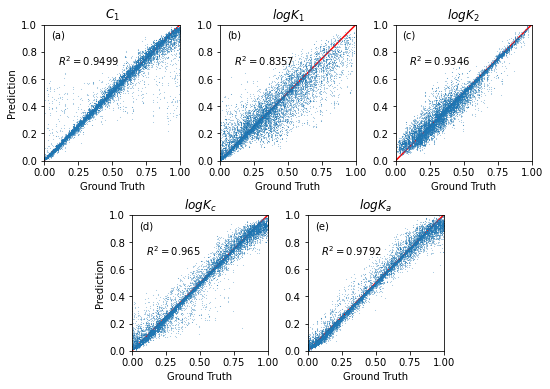

In [23]:
plot_figures(y_test, y_pred_RF_test, 'x', 'png')

# test on expeirment data

## cscl

In [4]:
df_exp_cscl = pd.read_pickle('datasets/exp/rutitle_cscl/test.pkl')
x_exp_cscl = df_exp_cscl.drop(['C1', 'C2', 'logK1', 'logK2', 'logKc', 'logKa', 'pH', 'sigma', 'zeta'], axis = 1)
y_exp_cscl = df_exp_cscl[['C1', 'logK1', 'logK2', 'logKc', 'logKa']]

In [5]:
x_exp_cscl = pd.concat([x_exp_cscl, 
                     pd.DataFrame(df_exp_cscl['pH'].to_list(), columns=['pH']*56), 
                     pd.DataFrame(df_exp_cscl['sigma'].to_list(), columns=['sigma']*56), 
                     pd.DataFrame(df_exp_cscl['zeta'].to_list(), columns=['zeta']*56)], axis=1)

In [6]:
x_exp_cscl

,Ns,PZC,C,pH,pH,pH,pH,pH,pH,pH,...,zeta,zeta,zeta,zeta,zeta,zeta,zeta,zeta,zeta,zeta
0,0.374779,0.400048,0.09991,0.260847,0.269058,0.27727,0.28548,0.293691,0.301902,0.310113,...,0.474024,0.471921,0.472298,0.471691,0.470905,0.470176,0.469558,0.46887,0.468603,0.467919


In [36]:
import time 
start_time = time.perf_counter()
pred_exp_cscl = regr_RF.predict(x_exp_cscl)
end_time = time.perf_counter()
print('time used to predict results with single data entry: ', (end_time - start_time), 's')
mean_squared_error(y_exp_cscl, pred_exp_cscl)

time used to predict results with single data entry:  0.03556724090594798 s


0.022284976879324382

In [37]:
min_con = [0.40002009999999993, -2.99983111, 2.08210729, 0.50085873, 0.50023814]
con_scale = [1.59997698,13.99264249, 24.80129247, 12.49877971, 12.498428239999999]

In [38]:
y_exp_cscl * con_scale + min_con

,C1,logK1,logK2,logKc,logKa
0,0.95,2.8,9.2,2.9,2.8


In [59]:
pred_exp_cscl * con_scale + min_con

array([[ 0.4674811 ,  1.12733227, 10.87712456,  3.28308252,  3.12433679]])

In [58]:
abs_err = abs((pred_exp_cscl* con_scale - (y_exp_cscl * con_scale).to_numpy()))/((y_exp_cscl * con_scale).to_numpy() + min_con)
abs_err, abs_err.sum(axis=1), abs_err.sum(axis=1)- abs_err[0][0]

(array([[0.50791463, 0.59738133, 0.18229615, 0.13209742, 0.11583457]]),
 array([1.5355241]),
 array([1.02760947]))

### LiCL

In [30]:
df_exp_licl = pd.read_pickle('datasets/exp/rutitle_LiCl/test.pkl')
x_exp_licl = df_exp_licl.drop(['C1', 'C2', 'logK1', 'logK2', 'logKc', 'logKa', 'pH', 'sigma', 'zeta'], axis = 1)
y_exp_licl = df_exp_licl[['C1', 'logK1', 'logK2', 'logKc', 'logKa']]

In [31]:
x_exp_licl = pd.concat([x_exp_licl, 
                     pd.DataFrame(df_exp_licl['pH'].to_list(), columns=['pH']*56), 
                     pd.DataFrame(df_exp_licl['sigma'].to_list(), columns=['sigma']*56), 
                     pd.DataFrame(df_exp_licl['zeta'].to_list(), columns=['zeta']*56)], axis=1)

In [62]:
import time 
start_time = time.perf_counter()
pred_exp_licl = regr_RF.predict(x_exp_licl)
end_time = time.perf_counter()
print('time used to predict results with single data entry: ', (end_time - start_time), 's')
mean_squared_error(y_exp_licl, pred_exp_licl)

time used to predict results with single data entry:  0.034999258001334965 s


0.09996373004949254

In [63]:
y_exp_licl * con_scale + min_con

,C1,logK1,logK2,logKc,logKa
0,1.55,2.8,9.2,3.2,2.6


In [64]:
pred_exp_licl * con_scale + min_con

array([[ 0.43400867,  1.53998791, 10.70894899,  3.45435893,  3.01101303]])

In [67]:
abs_err_licl = abs((pred_exp_licl* con_scale - (y_exp_licl * con_scale).to_numpy()))/((y_exp_licl * con_scale).to_numpy() + min_con)
abs_err_licl, abs_err_licl.sum(axis=1), abs_err_licl.sum(axis=1)- abs_err_licl[0][0]

(array([[0.71999441, 0.45000432, 0.16401619, 0.07948716, 0.15808193]]),
 array([1.57158402]),
 array([0.85158961]))